In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shopping-dataset/Shopping_data.csv


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('/kaggle/input/shopping-dataset/Shopping_data.csv')

In [5]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [7]:
df.tail(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
190,191,Female,34,103,23
191,192,Female,32,103,69
192,193,Male,33,113,8
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Convert pandas to numpy

In [8]:
df_array = df.to_numpy()

In [9]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Data Inspection 

In [12]:
print(df_array.shape)

(200, 5)


In [13]:
print(df_array[:5])

[[1 'Male' 19 15 39]
 [2 'Male' 21 15 81]
 [3 'Female' 20 16 6]
 [4 'Female' 23 16 77]
 [5 'Female' 31 17 40]]


Data Cleaning

In [16]:
missing_values = df.iloc[:, :10].isnull().sum()

missing_values

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Data have been cleaned and proceed to next step

In [20]:
print(df.columns)

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


Data Visualization 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


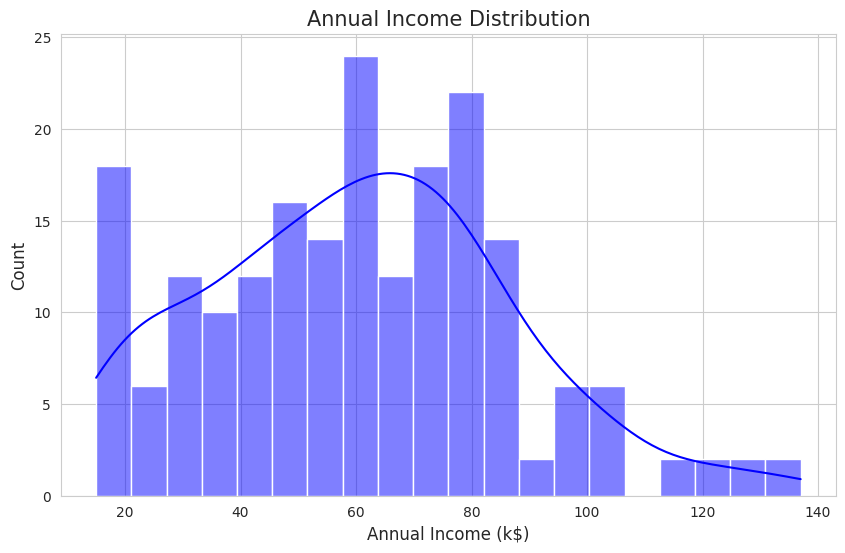

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


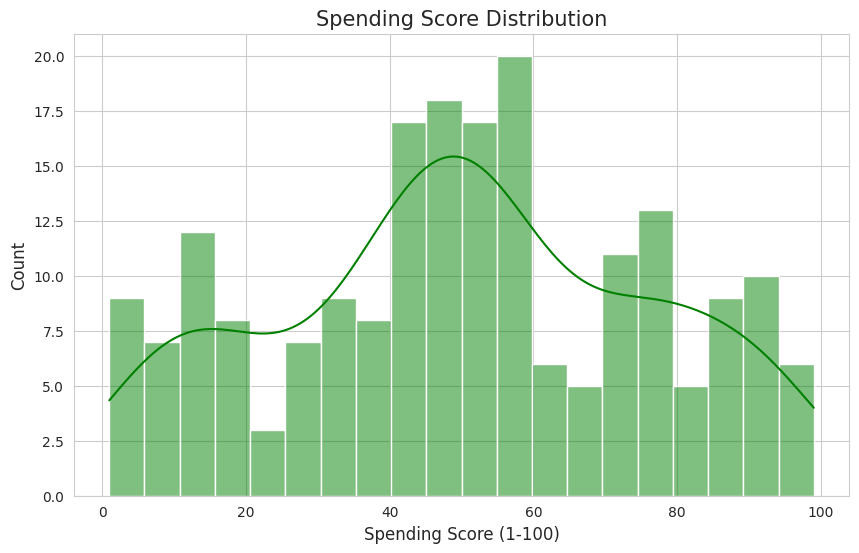

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


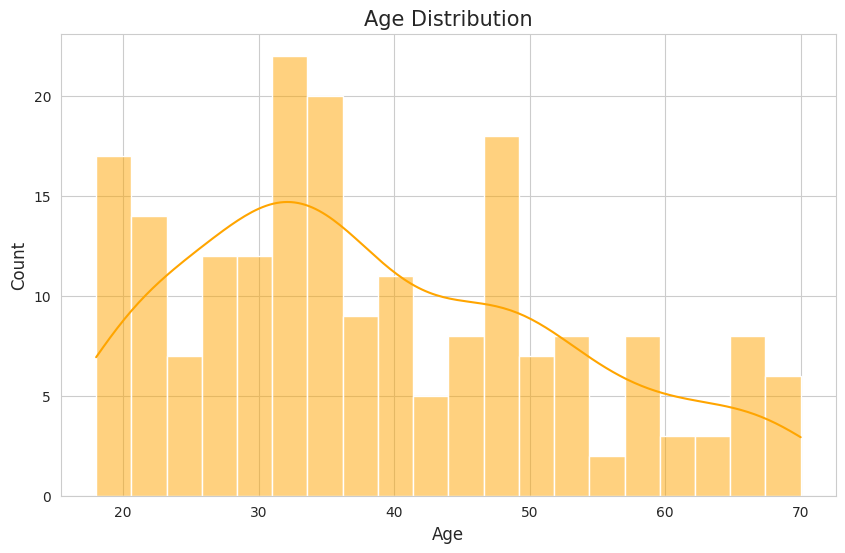

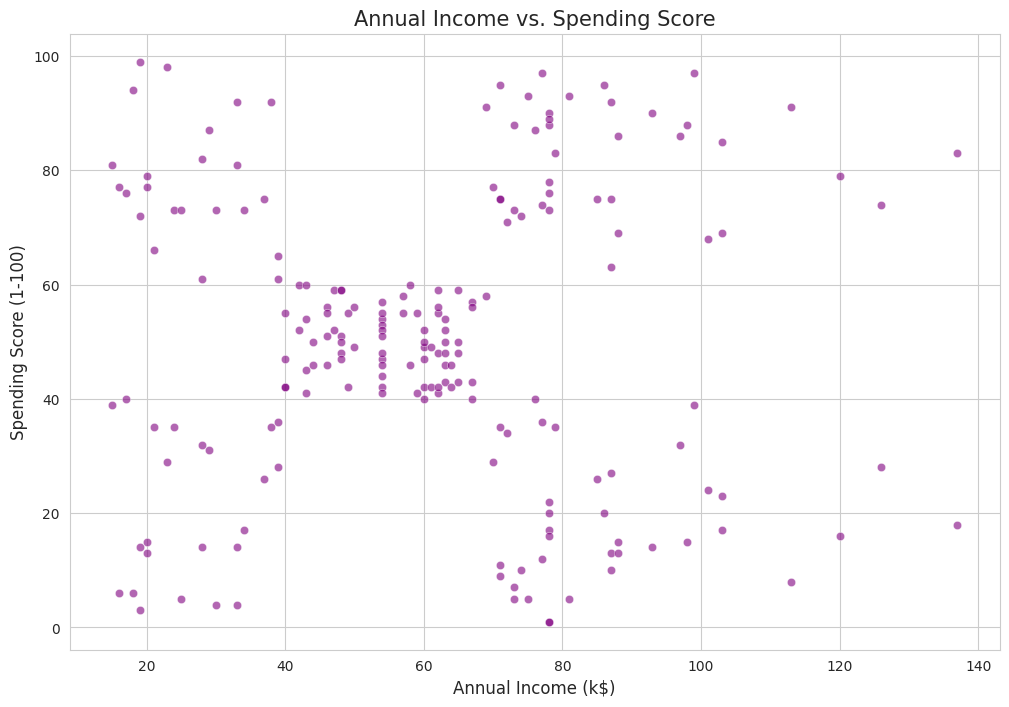

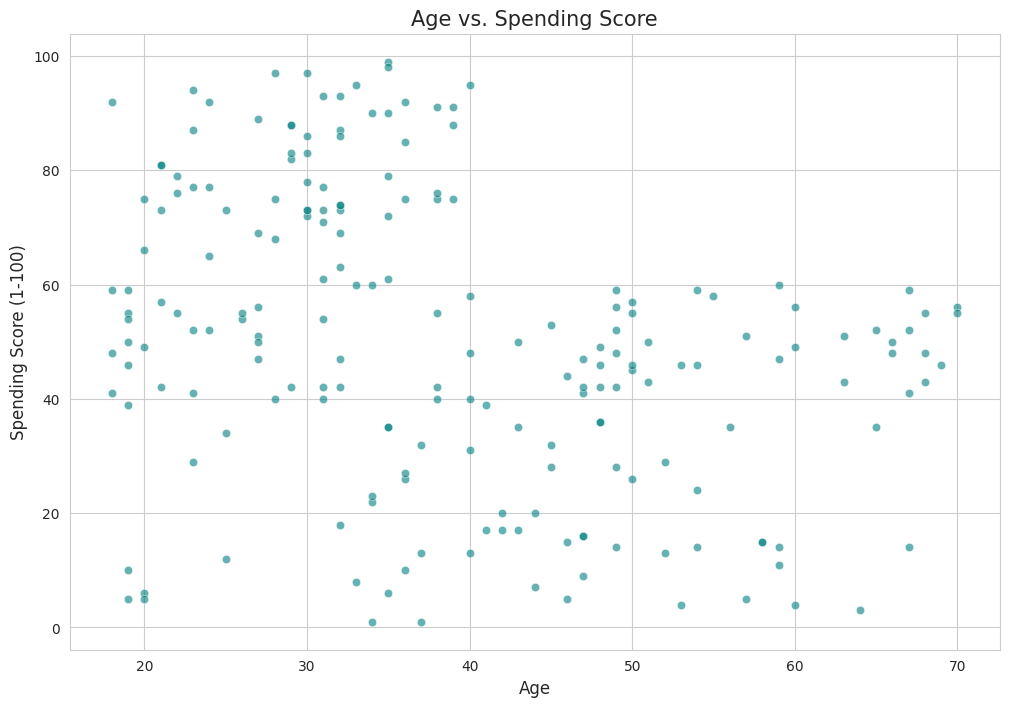

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/kaggle/input/shopping-dataset/Shopping_data.csv')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Since CustomerID is unique for each customer, a distribution plot for CustomerID is not meaningful.
# Therefore, this section has been removed. Instead, consider focusing on more insightful visualizations like those below.

# 2. Annual Income Distribution
plt.figure(figsize=(10, 6))  # Adjusted figure size for better visibility
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='blue')
plt.title('Annual Income Distribution', fontsize=15)  # Adjusted font size for better readability
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)  # Adjusted ticks font size for better readability
plt.yticks(fontsize=10)
plt.show()

# 3. Spending Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='green')
plt.title('Spending Score Distribution', fontsize=15)
plt.xlabel('Spending Score (1-100)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 4. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color='orange')
plt.title('Age Distribution', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 5. Annual Income vs. Spending Score
plt.figure(figsize=(12, 8))  # Adjusted figure size for a clearer view
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, alpha=0.6, color='purple')  # Removed hue='Gender'
plt.title('Annual Income vs. Spending Score', fontsize=15)
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# 6. Age vs. Spending Score
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, alpha=0.6, color='teal')  # Removed hue='Gender'
plt.title('Age vs. Spending Score', fontsize=15)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Data visualization using histogram - the distribution of the "Spending Score" 

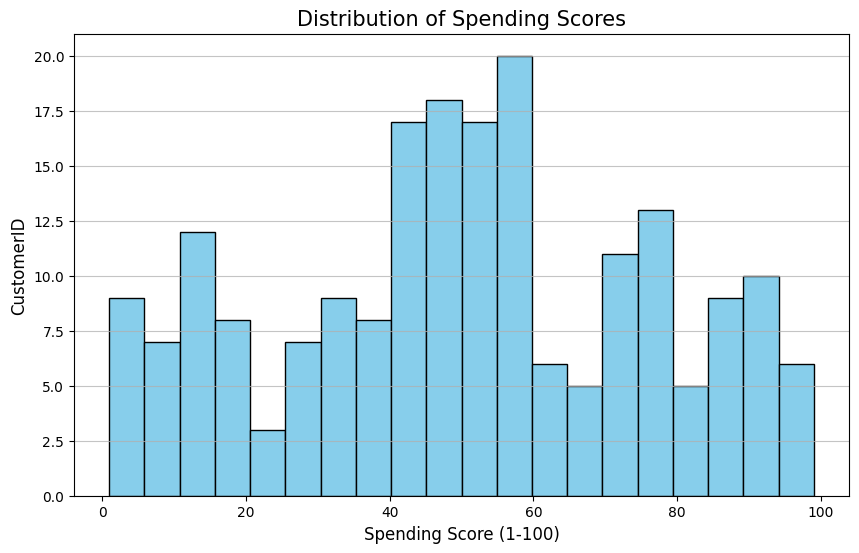

In [21]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Spending Score' is the column you're plotting

plt.figure(figsize=(10, 6))  # Set the figure size for better readability
plt.hist(df['Spending Score (1-100)'], bins=20, color='skyblue', edgecolor='black')  # Specify bins and color
plt.title('Distribution of Spending Scores', fontsize=15)  # Increase title font size
plt.xlabel('Spending Score (1-100)', fontsize=12)  # Increase X-axis label font size
plt.ylabel('CustomerID', fontsize=12)  # Increase Y-axis label font size
plt.grid(axis='y', alpha=0.75)  # Add grid lines for the Y-axis with some transparency
plt.xticks(fontsize=10)  # Increase font size of the X-axis ticks
plt.yticks(fontsize=10)  # Increase font size of the Y-axis ticks
plt.show()

Machine Learning in Numpy

Calculate Metrics

In [24]:
# Split data into features and target, for example
X = df.drop(columns=['CustomerID', 'Spending Score (1-100)'])
y = df['Spending Score (1-100)']

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('/kaggle/input/shopping-dataset/Shopping_data.csv')

# Assume we're making 'Spending Score' categorical (High/Low) for demonstration
df['Spending Score Category'] = pd.qcut(df['Spending Score (1-100)'], q=2, labels=['Low','High'])

# Define features and target
X = df.drop(['CustomerID', 'Spending Score (1-100)', 'Spending Score Category'], axis=1)
y = df['Spending Score Category']

# Basic preprocessing: convert categorical features to dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Calculate Metrics for 'Low' as the Positive Class

In [32]:
# Precision, Recall, F1-score for 'Low'

precision_low, recall_low, fscore_low, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='Low')
print("Precision (Low):", precision_low)
print("Recall (Low):", recall_low)
print("F1-score (Low):", fscore_low)


Precision (Low): 0.7619047619047619
Recall (Low): 0.6956521739130435
F1-score (Low): 0.7272727272727272


Calculate Metrics for 'High' as the Positive Class

In [31]:
# Assuming 'model' is already fitted with your training data

# Make predictions
y_pred = model.predict(X_test)

# Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Precision, Recall, F1-score for 'High'
precision_high, recall_high, fscore_high, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='High')
print("Precision (High):", precision_high)
print("Recall (High):", recall_high)
print("F1-score (High):", fscore_high)

# ROC AUC for 'High'
pos_label_index_high = list(model.classes_).index('High')  # Get index of 'High'
y_pred_proba_high = model.predict_proba(X_test)[:, pos_label_index_high]
print("ROC AUC (High):", roc_auc_score(y_test, y_pred_proba_high))

Accuracy: 0.7
Confusion Matrix:
 [[12  5]
 [ 7 16]]
Precision (High): 0.631578947368421
Recall (High): 0.7058823529411765
F1-score (High): 0.6666666666666667
ROC AUC (High): 0.27877237851662406


Hyperparameter Tuning

In [33]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 100}


Cross-Validation

In [34]:
# Evaluate model performance with cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)

Cross-validation scores: [0.675 0.525 0.625 0.675 0.8  ]
